#Speech Emotion Recognition (SER)

*Course project, ME781 : Group 29*

##Exploratory Data Analysis (EDA)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Imports
import os
import sys
import warnings

import librosa
import librosa.display
import IPython.display as ipd 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd

import glob 
from sklearn.metrics import confusion_matrix


In [ ]:
# Ignore Possible Warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

The 4 sources of the datasets need to be imported from Kaggle into the workspace. Their directory paths  are below:

In [ ]:
TESS = "/content/gdrive/MyDrive/SER Dataset/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"    #Dataset_1
RAV = "/content/gdrive/MyDrive/SER Dataset/RAVDESS/audio_speech_actors_01-24/"                                                      #Dataset_2                                                      
SAVEE = "/content/gdrive/MyDrive/SER Dataset/SAVEE/ALL/"                                                                            #Dataset_3
CREMA = "/content/gdrive/MyDrive/SER Dataset/CREMA-D/AudioWAV/"                                                                     #Dataset_4

# Test example 
dir_list = os.listdir(SAVEE)
dir_list[0:3]

['DC_a01.wav', 'DC_a10.wav', 'DC_a03.wav']

###The TESS Dataset

In [ ]:
#Types of Emotions
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [ ]:
path = []
emotion = []    #Emotions

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')   
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')                             
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
          emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

df_TESS = pd.DataFrame(emotion, columns = ['labels'])
df_TESS['source'] = 'TESS'

df_TESS = pd.concat([df_TESS,pd.DataFrame(path, columns = ['path'])],axis=1)
df_TESS.labels.value_counts()

female_neutral     400
female_angry       400
female_happy       400
female_surprise    400
female_sad         400
female_disgust     400
female_fear        400
Name: labels, dtype: int64

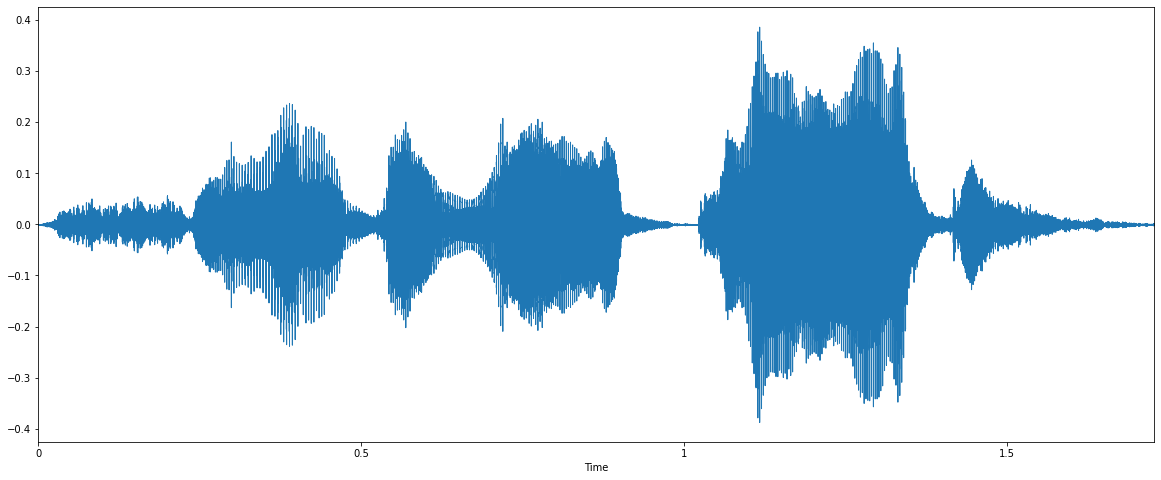

In [ ]:
# Visualize the Audio Data
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, rate = librosa.load(fname)
plt.figure(figsize=(20, 8))
librosa.display.waveplot(data, sr=rate)

# Play Audio
ipd.Audio(fname)

###The RAVDESS Dataset

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []    #Emotions
gender = []     #Gender
path = []      

for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
df_RAVDESS = pd.DataFrame(emotion)
df_RAVDESS = df_RAVDESS.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})

df_RAVDESS = pd.concat([pd.DataFrame(gender),df_RAVDESS],axis=1)
df_RAVDESS.columns = ['gender','emotion']
df_RAVDESS['labels'] =df_RAVDESS.gender + '_' + df_RAVDESS.emotion
df_RAVDESS['source'] = 'RAVDESS'  
df_RAVDESS = pd.concat([df_RAVDESS,pd.DataFrame(path, columns = ['path'])],axis=1)

df_RAVDESS = df_RAVDESS.drop(['gender', 'emotion'], axis=1)
df_RAVDESS.labels.value_counts()

male_neutral       144
female_neutral     144
male_happy          96
female_surprise     96
female_sad          96
male_disgust        96
male_surprise       96
male_fear           96
female_disgust      96
female_fear         96
female_angry        96
male_sad            96
female_happy        96
male_angry          96
Name: labels, dtype: int64

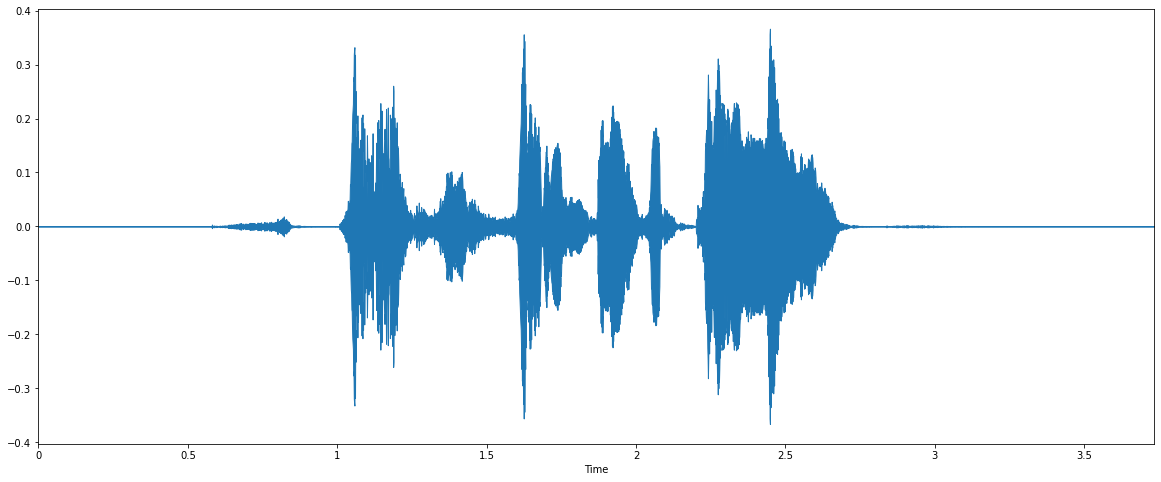

In [ ]:
# Visualize the Audio Data
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, rate = librosa.load(fname)
plt.figure(figsize=(20, 8))
librosa.display.waveplot(data, sr=rate)

# Play Audio 
ipd.Audio(fname)

###The SAVEE Dataset

In [ ]:
dir_list = os.listdir(SAVEE)

# Get Emotions from Filename
emotion=[]      #Emotions array
path = []       #Path
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
      emotion.append('male_surprise')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    else:
        emotion.append('male_error')    #If no such path is found
    path.append(SAVEE + i)
    
# Distribution of label counts
df_SAVEE = pd.DataFrame(emotion, columns = ['labels'])
df_SAVEE['source'] = 'SAVEE'
df_SAVEE = pd.concat([df_SAVEE, pd.DataFrame(path, columns = ['path'])], axis = 1)
df_SAVEE.labels.value_counts()

male_neutral     120
male_surprise     60
male_happy        60
male_fear         60
male_sad          60
male_angry        60
male_disgust      60
Name: labels, dtype: int64

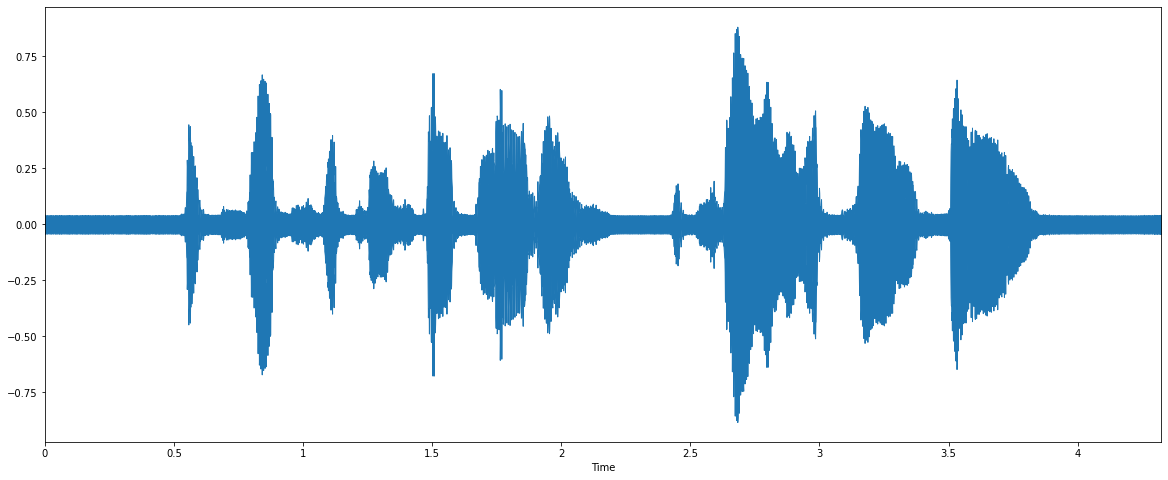

In [ ]:
# Visualize the Audio Data
fname = SAVEE + 'DC_f11.wav'  
data, rate = librosa.load(fname)
plt.figure(figsize=(20, 8))
librosa.display.waveplot(data, sr=rate)

# Play Audio
ipd.Audio(fname)

###The CREMA-D Dataset

In [ ]:
#Names of Audio Files
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:8])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav']


In [ ]:
gender = []     #Gender
emotion = []    #Emotions
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
df_CREMAD = pd.DataFrame(emotion, columns = ['labels'])
df_CREMAD['source'] = 'CREMA'

df_CREMAD = pd.concat([df_CREMAD,pd.DataFrame(path, columns = ['path'])],axis=1)
df_CREMAD.labels.value_counts()

male_disgust      671
male_angry        671
male_fear         671
male_happy        671
male_sad          671
female_sad        602
female_disgust    602
female_fear       602
female_happy      602
female_angry      602
male_neutral      575
female_neutral    514
Name: labels, dtype: int64

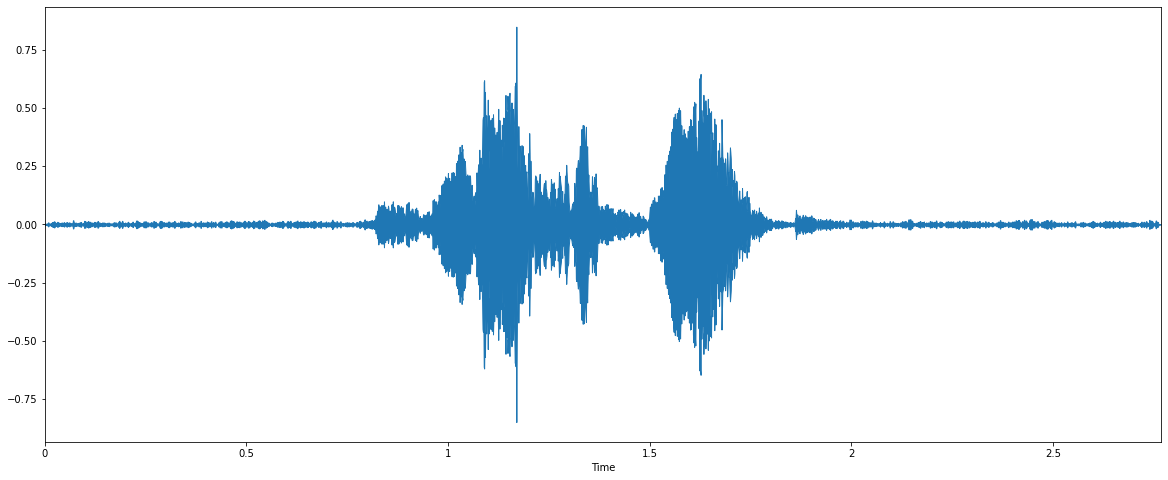

In [ ]:
# Visualize the Audio Data
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, rate = librosa.load(fname)
plt.figure(figsize=(20, 8))
librosa.display.waveplot(data, sr=rate)

# Play Audio 
ipd.Audio(fname)

###Summary of Datasets

In [ ]:
data_f = pd.concat([df_TESS, df_RAVDESS, df_SAVEE, df_CREMAD], axis = 0)
print(data_f.labels.value_counts())

data_f.head()
data_f.to_csv("Data_path.csv",index=False)

female_fear        1098
female_sad         1098
female_disgust     1098
female_happy       1098
female_angry       1098
female_neutral     1058
male_neutral        839
male_disgust        827
male_angry          827
male_sad            827
male_fear           827
male_happy          827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


##Feature Extraction

In [ ]:
# Imports
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd

import librosa
import librosa.display
import IPython.display as ipd  

###Audio-Image Conversion : MFCC Plot

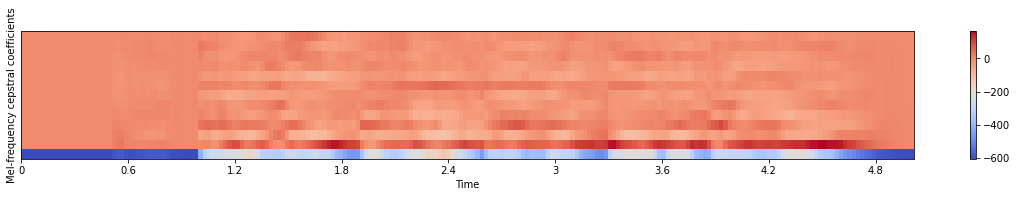

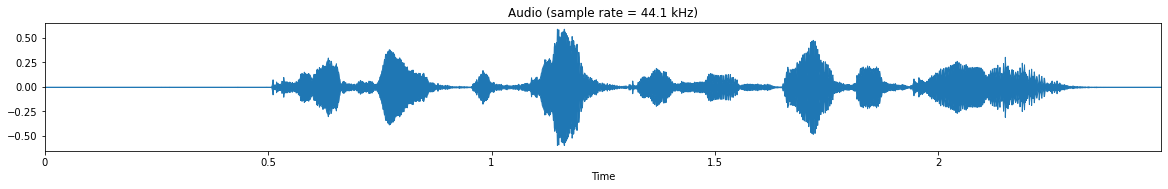

In [ ]:
#Convert audio data into an image using MFCC (Mel-frequency cepstral coefficients) for ease of analysis

path = "/content/gdrive/MyDrive/SER Dataset/RAVDESS/Actor_04/03-01-05-02-01-02-04.wav"          #RAVDESS Dataset file
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Image
plt.figure(figsize=(20, 8))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('Mel-frequency cepstral coefficients')
plt.colorbar()

# Audio
plt.figure(figsize=(20, 8))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio (sample rate = 44.1 kHz)')

#Play Audio
ipd.Audio(path)

###Analyzing the MFCC Plot : Statistics

Male Audio- 216
Female Audio- 216


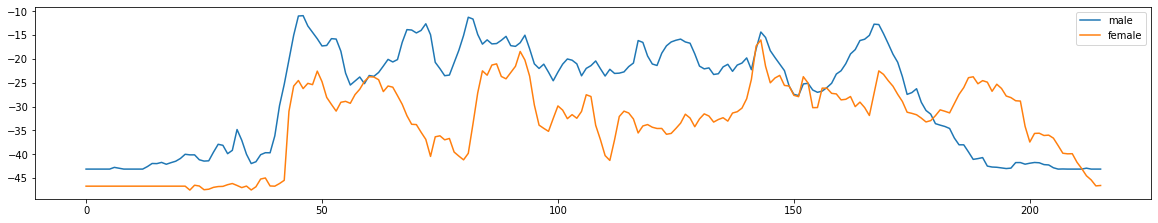

In [ ]:
#Compare male and female audios for the same emotion from the same dataset

#Male Audio
path = "/content/gdrive/MyDrive/SER Dataset/RAVDESS/audio_speech_actors_01-24/Actor_05/03-01-05-02-01-01-05.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print('Male Audio-',len(male))

#Female Audio
path = "/content/gdrive/MyDrive/SER Dataset/RAVDESS/audio_speech_actors_01-24/Actor_04/03-01-05-02-01-02-04.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print('Female Audio-',len(female))

# Plot the audios
plt.figure(figsize=(20, 12))
plt.subplot(3,1,1)

plt.plot(male, label='male')
plt.plot(female, label='female')


plt.legend()

## Model Generation

In [ ]:
# Imports

import keras

from keras import regularizers

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

from keras.models import Sequential, Model, model_from_json
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
import json
import glob 
import pickle

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns

import librosa
import librosa.display
import IPython.display as ipd  

###Data Pre-processing

In [ ]:
# Read Data from EDA
ref = pd.read_csv("/content/Data_path.csv")
ref.head()

,labels,source,path
0,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...
1,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...
2,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...
3,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...
4,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...


In [ ]:
df = pd.DataFrame(columns=['feature'])

# Extract features from all datasets
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path , res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    # Calculate dataset mean
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Test
print('Size:',len(df))
df.head()

Size: 12174


,feature
0,"[-28.61425, -29.163574, -30.963696, -29.72283,..."
1,"[-14.9276495, -19.177805, -32.440823, -32.0218..."
2,"[-19.030453, -22.088514, -31.511173, -30.10062..."
3,"[-17.34745, -19.47376, -29.23166, -28.630749, ..."
4,"[-10.043161, -13.771801, -28.228872, -27.99818..."


In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-28.614250,-29.163574,-30.963696,-29.722830,-29.709068,-31.740353,-32.703110,-32.493820,-32.284859,-33.045765,-32.947151,-32.051189,-33.121288,-32.573406,-32.058254,-31.981236,-32.749611,-33.951973,-32.976368,-33.147034,-34.836998,-33.871445,-34.276695,-36.294674,-35.285564,-35.832176,-36.125469,-35.396545,-34.013416,-34.569561,-34.731392,-34.660351,-34.879311,-33.833981,-33.487446,-32.901562,-32.369858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-14.927649,-19.177805,-32.440823,-32.021893,-32.209694,-34.273319,-35.611012,-35.120895,-32.919327,-32.953255,-33.469780,-34.013596,-35.458183,-36.381813,-36.383835,-36.746487,-35.774529,-35.460934,-34.599712,-33.887741,-34.201649,-35.844955,-34.925644,-33.970440,-34.496506,-34.793068,-34.780487,-36.446125,-35.125237,-33.393730,-33.592415,-32.474312,-32.628319,-34.141552,-36.960049,-40.569458,-43.847191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-19.030453,-22.088514,-31.511173,-30.100624,-26.580198,-26.408049,-30.808245,-29.599789,-26.267996,-23.743034,-25.618389,-28.444958,-30.973804,-34.950741,-35.095329,-32.777699,-32.166779,-32.573158,-33.361130,-31.932680,-32.195919,-33.047092,-33.414150,-33.719940,-34.858078,-35.242924,-34.825851,-35.479691,-36.228416,-36.437153,-36.364799,-35.285030,-35.154221,-34.843460,-33.801617,-33.750530,-32.779373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-17.347450,-19.473761,-29.231661,-28.630749,-27.004507,-28.194307,-29.330812,-30.566315,-32.353767,-30.295284,-28.895803,-29.839436,-29.757561,-30.062019,-31.890821,-33.372513,-33.348656,-33.226307,-32.971146,-30.716846,-29.744272,-30.075161,-33.056057,-33.200420,-32.321331,-32.543221,-33.860134,-32.169235,-31.410753,-32.685532,-31.924477,-33.460819,-35.124733,-34.931347,-29.978609,-26.986498,-28.917358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-10.043161,-13.771801,-28.228872,-27.998182,-29.020769,-28.874743,-27.052286,-28.060921,-31.978767,-31.323151,-29.999258,-29.387190,-29.891724,-30.608795,-30.017853,-28.673321,-28.028633,-26.549978,-27.355806,-29.217424,-29.440714,-28.861467,-29.192631,-28.756710,-27.591127,-29.220425,-31.261192,-31.105083,-30.647617,-30.931164,-30.127831,-29.469759,-31.104126,-30.869595,-31.303413,-31.736732,-31.286949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert non-numeric data into numerical type
df=df.fillna(0)
print(df.shape)
df[:4]

(12174, 219)


,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-28.614250,-29.163574,-30.963696,-29.722830,-29.709068,-31.740353,-32.703110,-32.493820,-32.284859,-33.045765,-32.947151,-32.051189,-33.121288,-32.573406,-32.058254,-31.981236,-32.749611,-33.951973,-32.976368,-33.147034,-34.836998,-33.871445,-34.276695,-36.294674,-35.285564,-35.832176,-36.125469,-35.396545,-34.013416,-34.569561,-34.731392,-34.660351,-34.879311,-33.833981,-33.487446,-32.901562,-32.369858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-14.927649,-19.177805,-32.440823,-32.021893,-32.209694,-34.273319,-35.611012,-35.120895,-32.919327,-32.953255,-33.469780,-34.013596,-35.458183,-36.381813,-36.383835,-36.746487,-35.774529,-35.460934,-34.599712,-33.887741,-34.201649,-35.844955,-34.925644,-33.970440,-34.496506,-34.793068,-34.780487,-36.446125,-35.125237,-33.393730,-33.592415,-32.474312,-32.628319,-34.141552,-36.960049,-40.569458,-43.847191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-19.030453,-22.088514,-31.511173,-30.100624,-26.580198,-26.408049,-30.808245,-29.599789,-26.267996,-23.743034,-25.618389,-28.444958,-30.973804,-34.950741,-35.095329,-32.777699,-32.166779,-32.573158,-33.361130,-31.932680,-32.195919,-33.047092,-33.414150,-33.719940,-34.858078,-35.242924,-34.825851,-35.479691,-36.228416,-36.437153,-36.364799,-35.285030,-35.154221,-34.843460,-33.801617,-33.750530,-32.779373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,female_fear,TESS,/content/gdrive/MyDrive/SER Dataset/TESS/TESS ...,-17.347450,-19.473761,-29.231661,-28.630749,-27.004507,-28.194307,-29.330812,-30.566315,-32.353767,-30.295284,-28.895803,-29.839436,-29.757561,-30.062019,-31.890821,-33.372513,-33.348656,-33.226307,-32.971146,-30.716846,-29.744272,-30.075161,-33.056057,-33.200420,-32.321331,-32.543221,-33.860134,-32.169235,-31.410753,-32.685532,-31.924477,-33.460819,-35.124733,-34.931347,-29.978609,-26.986498,-28.917358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Train-Test Splitting of Dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1), df.labels, test_size=0.25, shuffle=True, random_state=42)

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
8713,-18.331499,-18.837683,-17.346666,-14.654595,-15.524789,-19.938511,-16.831343,-14.755032,-17.042700,-16.620291,-12.741360,-10.881587,-11.902197,-10.752090,-9.104261,-7.755428,-8.553964,-11.205561,-11.746992,-11.619398,-12.009558,-12.655396,-13.144672,-12.982802,-11.736082,-11.859058,-12.812132,-13.828904,-14.291640,-14.146971,-12.866653,-12.884572,-14.536279,-13.525951,-12.023139,-13.002107,-14.417201,-15.391378,-14.577607,-11.200372,...,-15.839721,-17.869572,-19.466564,-19.149916,-17.511517,-17.397526,-19.386047,-21.661325,-17.773918,-16.924238,-18.360554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9464,-16.855898,-16.825766,-19.538656,-19.218494,-17.346445,-16.536766,-17.735563,-19.729221,-19.034014,-17.054655,-18.434586,-19.213692,-18.190464,-17.300478,-19.417629,-18.247215,-19.286358,-20.961586,-19.113920,-18.215477,-19.093517,-20.473415,-22.023237,-20.165724,-19.902082,-17.921499,-16.789043,-17.283949,-18.448793,-19.063604,-18.664364,-17.920826,-17.305773,-17.537453,-17.466204,-16.868355,-17.973902,-19.828276,-18.440683,-18.868145,...,-16.781767,-17.344212,-19.908215,-17.324095,-17.044725,-17.019062,-15.043935,-17.470432,-17.055670,-15.317180,-15.746606,-15.351452,-16.103603,-16.578905,-16.462645,-15.810699,-14.430105,-16.225342,-16.228249,-16.309757,-17.954515,-18.392397,-14.362131,-13.713459,-14.997588,-15.490171,-16.332317,-16.532694,-16.911407,-17.542633,-17.547176,-17.985157,-18.769405,-18.905560,-19.274500,-17.725645,-14.991902,-16.545509,-19.264158,-22.728954
2400,-18.743700,-22.317219,-30.611053,-32.853718,-36.182808,-37.818844,-37.808136,-36.874096,-37.576962,-37.581493,-35.601978,-37.630581,-35.233421,-32.776482,-29.727375,-23.624992,-21.768492,-24.624214,-27.163828,-27.710842,-28.826946,-28.986877,-28.529032,-29.606548,-29.954233,-30.650679,-29.944761,-29.671169,-30.249210,-29.954947,-29.573988,-29.614876,-30.023342,-30.402925,-24.247017,-17.690075,-16.068243,-19.852062,-24.229078,-26.795267,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4901,-12.778377,-15.343199,-20.130175,-18.578896,-18.080111,-19.689690,-18.542091,-19.706165,-21.981016,-21.287645,-20.713726,-21.086092,-20.510820,-20.644217,-19.711138,-17.596920,-15.454010,-15.824986,-17.734632,-15.842257,-13.528994,-14.550106,-17.269957,-18.657669,-22.042370,-23.350985,-21.133007,-20.345470,-18.318188,-16.478245,-17.368475,-19.330072,-19.536594,-18.442728,-17.208809,-17.715221,-17.800333,-18.740627,-19.064690,-18.459784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4148,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.106735,-50.019333,-50.033428,-50.106735,-50.106735,

In [ ]:
# Normalization
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
8713,0.203681,0.212612,0.517210,0.711261,0.637715,0.302879,0.525739,0.674931,0.500350,0.528562,0.811941,0.945215,0.860944,0.943089,1.057817,1.152109,1.088574,0.891388,0.846717,0.857139,0.826910,0.777351,0.737688,0.747556,0.835403,0.827645,0.752667,0.674478,0.633335,0.641877,0.731557,0.730340,0.604972,0.682368,0.793968,0.722188,0.616341,0.543233,0.604423,0.877644,...,-0.377428,-0.518896,-0.625010,-0.632942,-0.513335,-0.494874,-0.663701,-0.812547,-0.558853,-0.492660,-0.585007,0.650003,0.648268,0.647060,0.623107,0.622282,0.622686,0.603889,0.602396,0.602265,0.584441,0.584041,0.584659,0.571264,0.571399,0.572148,0.551808,0.552286,0.553739,0.536874,0.536638,0.522424,0.521841,0.522315,0.508083,0.508120,0.508654,0.497984,0.492404,0.487405
9464,0.307595,0.360054,0.353120,0.370675,0.502077,0.556131,0.458615,0.306090,0.352680,0.496367,0.389531,0.326863,0.395440,0.457752,0.294016,0.375606,0.293427,0.167936,0.300716,0.366998,0.300277,0.196987,0.078592,0.213838,0.229688,0.377418,0.457348,0.418011,0.325915,0.278567,0.303290,0.357441,0.399162,0.383218,0.385948,0.430452,0.345406,0.201722,0.303655,0.271537,...,-0.445369,-0.481208,-0.656474,-0.502551,-0.480145,-0.468245,-0.357535,-0.519350,-0.508893,-0.381642,-0.405587,-0.401292,-0.449496,-0.475382,-0.488698,-0.440972,-0.343707,-0.480769,-0.474776,-0.470450,-0.595873,-0.618247,-0.347121,-0.316969,-0.393415,-0.413807,-0.489187,-0.494915,-0.508117,-0.566093,-0.560172,-0.598710,-0.644152,-0.645560,-0.681471,-0.581841,-0.407403,-0.509385,-0.685758,-0.894961
2400,0.174653,-0.042384,-0.475751,-0.646867,-0.900452,-1.028271,-1.031443,-0.965219,-1.022413,-1.025053,-0.884205,-1.039912,-0.866206,-0.689260,-0.469517,-0.022407,0.109530,-0.103665,-0.295905,-0.338581,-0.423322,-0.435002,-0.404363,-0.487650,-0.515931,-0.567915,-0.519573,-0.501491,-0.546723,-0.526238,-0.502583,-0.508421,-0.545921,-0.576200,-0.122352,0.368448,0.490572,0.199891,-0.147013,-0.355071,...,0.764927,0.763000,0.761803,0.734656,0.731787,0.729234,0.703228,0.702891,0.677476,0.676496,0.675252,0.650003,0.648268,0.647060,0.623107,0.622282,0.622686,0.603889,0.602396,0.602265,0.584441,0.584041,0.584659,0.571264,0.571399,0.572148,0.551808,0.552286,0.553739,0.536874,0.536638,0.522424,0.521841,0.522315,0.508083,0.508120,0.508654,0.497984,0.492404,0.487405
4901,0.594740,0.468703,0.308839,0.418406,0.447450,0.321404,0.398744,0.307800,0.134139,0.182624,0.220430,0.187906,0.223670,0.209929,0.272279,0.423735,0.577360,0.548837,0.402942,0.543347,0.713953,0.636698,0.431450,0.325893,0.070932,-0.025803,0.134773,0.190754,0.335573,0.469610,0.399015,0.253096,0.233383,0.315709,0.405242,0.366550,0.358628,0.285439,0.255072,0.303817,...,0.764927,0.763000,0.761803,0.734656,0.731787,0.729234,0.703228,0.702891,0.677476,0.676496,0.675252,0.650003,0.648268,0.647060,0.623107,0.622282,0.622686,0.603889,0.602396,0.602265,0.584441,0.584041,0.584659,0.571264,0.571399,0.572148,0.551808,0.552286,0.553739,0.536874,0.536638,0.522424,0.521841,0.522315,0.508083,0.508120,0.508654,0.497984,0.492404,0.487405
4148,-2.033975,-2.078924,-1.935181,-1.934392,-1.937208,-1.943076,-1.944412,-1.946433,-1.951586,-1.953407,-1.960386,-1.965806,-1.967238,-1.973701,-1.978799,-1.982335,-1.990008,-1.993308,-1.996324,-2.002771,-2.005298,-2.002816,-2.006173,-2.010890,-2.010747,-2.012820,-2.016766,-2.018421,-2.015183,-2.015334,-2.019299,-2.019228,-2.032933,-2.045575,-2.060836,-2.077614,-2.102344,-2.128831,-2.161771,-2.197750,...,-2.848755,-2.831468,-2.807840,-2.843735,-2.830955,-2.796328,-2.829848,-2.802604,-2.807879,-2.784966,-2.764048,-2.781397,-2.767449,-2.745318,-2.760853,-2.747346,-2.732993,-2.745727,-2.723506,-2.693325,-2.709533,-2.691373,-2.666142,-2.674195,-2.652032,-2.617163,-2.641913,-2.621537,-2.592429,-2.613513,-2.595352,-2.

In [ ]:
# Convert data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# One Hot Encoding
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

#Print the Data
print('Training Data:')
print(X_train.shape)
print('Classes:')
print(lb.classes_)


# Serialize Object using Pickle
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

Training Data:
(9130, 216)
Classes:
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [ ]:
#Adding a 3rd Dimension (constant value 1) since we only have 2D CNN
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9130, 216, 1)

###The Model

In [ ]:

model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  
model.add(Activation('relu'))               #ReLU
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())             #Normalize
model.add(Activation('relu'))               #ReLU
model.add(Dropout(0.25))                    #Dropout

model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))               #ReLU
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))               #ReLU
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))               #ReLU
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())             #Normalize
model.add(Activation('relu'))               #ReLU
model.add(Dropout(0.25))                    #Dropout

model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))               #ReLU
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))               #ReLU
model.add(Flatten())
model.add(Dense(14)) 
model.add(Activation('softmax'))            #SoftMax

opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

#Show Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          2304      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 216, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 216, 256)          0         
                                                                 
 dropout (Dropout)           (None, 216, 256)          0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#Loss Function : categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

571/571 [==============================] - 208s 360ms/step - loss: 2.3634 - accuracy: 0.1893 - val_loss: 2.4195 - val_accuracy: 0.2178


In [ ]:
#Plot the model loss to evaluate it
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Evaluating the Model')
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.legend(['Train', 'Test'])

plt.show()

###Saving the Model for Reusability

In [ ]:
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

# Weights and Model

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save the model, weights at the location : %s ' % model_path)

# Saving model to Disk

model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

print('Done')

###Validating the Model

In [ ]:
# Load architecture (json)

json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Optimization using Keras Optimizer

opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)

print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
#Predictions

preds = loaded_model.predict(X_test, batch_size=16, verbose=1)
preds=preds.argmax(axis=1)

preds

In [ ]:
#Extracting labels from predicted values
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

#Labels (actual)

actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

#Comparing actual and predicted values
finaldf = actual.join(preds)
finaldf[160:175]

In [ ]:
#Save Predictions 
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

####Confusion Matrix and Classification Report

In [ ]:
#Generate the Confusion Matrix

def print_confusion_matrix(confusion_matrix, class_names, figsize = (12,5), fontsize=3):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

#Find Gender

def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

In [ ]:
#Predictions from Disk

finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

#Confusion matrix 

c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print('Accuracy: ',accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Generate Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.00      0.00      0.00       295
 female_disgust       0.17      0.28      0.21       256
    female_fear       0.43      0.29      0.35       275
   female_happy       0.31      0.15      0.20       283
 female_neutral       0.24      0.42      0.31       270
     female_sad       0.16      0.71      0.26       263
female_surprise       0.45      0.04      0.07       125
     male_angry       0.38      0.51      0.43       197
   male_disgust       0.18      0.10      0.13       214
      male_fear       0.17      0.04      0.06       210
     male_happy       0.18      0.13      0.15       214
   male_neutral       0.25      0.03      0.06       205
       male_sad       0.03      0.00      0.01       201
  male_surprise       0.00      0.00      0.00        36

       accuracy                           0.22      3044
      macro avg       0.21      0.19      0.16      3044
   weighted avg       0.22   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####Gender

In [ ]:
#Results Considering only Gender
modidf = finaldf

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

#Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print('Gender Accuracy',accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Generate Classification report
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

#####Emotions

In [ ]:
#Results Considering only Emotions
modidf = pd.read_csv("Predictions.csv")

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

#Confusion matrix 

c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print('Emotion Accuracy:',accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

##Testing the Model on New Data

In [ ]:
# Imports
import os
import pickle
import wave  
import sys
import warnings

import pandas as pd
import numpy as np
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras 

import librosa
import librosa.display
import IPython.display as ipd 

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
pip install pydub

In [ ]:
pip install fleep

  Created wheel for fleep: filename=fleep-1.0.1-py3-none-any.whl size=6120 sha256=641cf650099f3f6f70561638928e77cbf91ba75a73e8b7083cef8fb51e060c4e
  Stored in directory: /root/.cache/pip/wheels/f5/58/27/05a17a14e4156d74b9bce0c25cd9249a0653205ea374aadbd1
Successfully built fleep


In [ ]:
#class for 
from pydub import AudioSegment
import math

class SplitWavAudioMubin():
    def __init__(self, folder, filename):
        self.folder = folder
        self.filename = filename
        self.filepath = folder + '/' + filename
        
        self.audio = AudioSegment.from_wav(self.filepath)
    
    def get_duration(self):
        return self.audio.duration_seconds
    
    def single_split(self, from_t, to_t, split_filename):
        t1 = from_t * 1000
        t2 = to_t * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(self.folder + '/' + split_filename, format="wav")
        
    def multiple_split(self,segment_length):
        total_t = math.ceil(self.get_duration())
        for i in range(0, total_t,segment_length):
            split_fn = str(i) + '_' + self.filename
            self.single_split(i, i+segment_length, split_fn)
            print(str(i) + ' Done')
            if i == total_t - segment_length:
                print('All splited successfully')
        return(i)

In [ ]:
import os
import fleep
from pydub import AudioSegment

def get_audio():
  folder = str(input("Enter Folder Directory: "))
  if str(os.path.isdir(folder)) =='True' :
    f=0
    while (f==0):
      file = str(input("Enter File Name: "))
      if str(os.path.isfile(folder + '/' + file)) == 'True':
        with open(folder + '/' + file, "rb") as fi:
          info = fleep.get(fi.read(128))
        if info.extension[0] == 'mp3' :
          src = folder + '/' + file
          dst = src + '.wav'
          # convert mp3 to wav
          sound = AudioSegment.from_mp3(src)
          sound.export(dst, format="wav")
          file=file+'.wav'
          split_wav = SplitWavAudioMubin(folder, file)
          k = split_wav.multiple_split(segment_length=5)
          f=1
        elif info.extension[0] == 'm4a' or info.extension[0] == 'wav':
          split_wav = SplitWavAudioMubin(folder, file)
          k = split_wav.multiple_split(segment_length=5)
          f=1
        else:
          print("Please enter name of audio file with supported a format (mp3,m4a,wav)") 
      else:
        print("Please ensure that the file is in the directory specified above and verify the file name")
    return(k)
  else:
    print('Check if directory is correct') 
    get_audio()

k = get_audio()

Enter Folder Directory: /content/
Enter File Name: courtesy.wav
0 Done
5 Done
10 Done
15 Done


In [ ]:
n = k/5

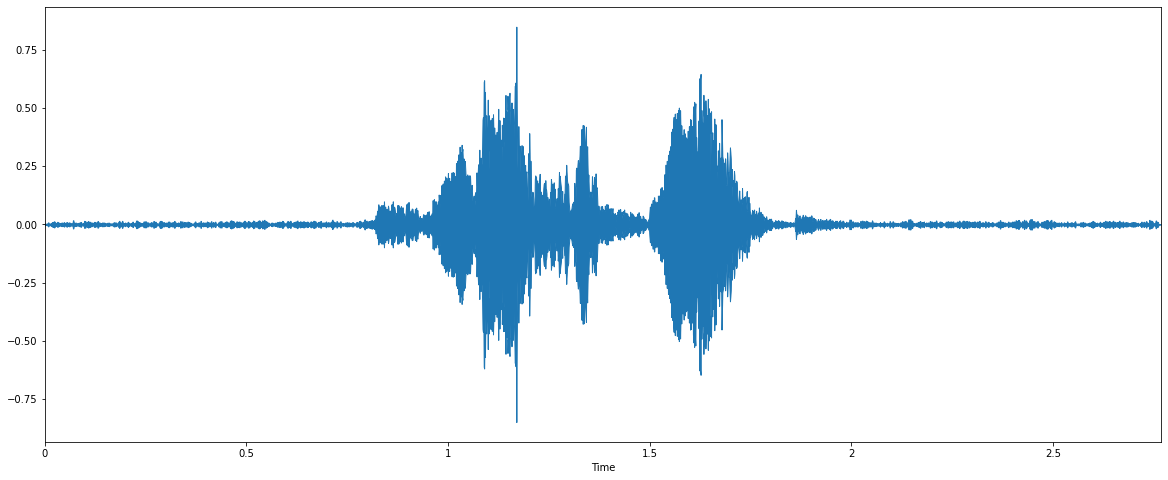

In [ ]:
plt.figure(figsize=(20, 8))
librosa.display.waveplot(data, sr=rate)

In [ ]:
# Model architecture (json) 

json_file = open('/content/model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/saved_models/Emotion_Model.h5")
print("Model Loaded!")

#Keras Optimizer

opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model Loaded!


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
for i in range(int(n)):
  # Transform Dataset
  X, sample_rate = librosa.load('/content/' + str(5*i) + '_' + file,res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)

  sample_rate = np.array(sample_rate)
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
  newdf = pd.DataFrame(data=mfccs).T

  newdf

  # Predictions
  newdf= np.expand_dims(newdf, axis=2)
  newpred = loaded_model.predict(newdf, 
                          batch_size=16, 
                          verbose=1)

  filename = '/content/labels'
  infile = open(filename,'rb')

  lb = pickle.load(infile)
  infile.close()

  # Final Prediction
  final = newpred.argmax(axis=1)
  final = final.astype(int).flatten()
  final = (lb.inverse_transform((final)))
  print('Predicted label:',final) 

1/1 [==============================] - 0s 231ms/step
Predicted label: ['female_surprise']
1/1 [==============================] - 0s 34ms/step
Predicted label: ['female_neutral']
1/1 [==============================] - 0s 36ms/step
Predicted label: ['female_happy']


In [ ]:
  # Predictions
  newdf= np.expand_dims(newdf, axis=2)
  newpred = loaded_model.predict(newdf, 
                          batch_size=16, 
                          verbose=1)

  newpred

In [ ]:
  filename = '/content/labels'
  infile = open(filename,'rb')

  lb = pickle.load(infile)
  infile.close()

  # Final Prediction
  final = newpred.argmax(axis=1)
  final = final.astype(int).flatten()
  final = (lb.inverse_transform((final)))
  print('Predicted label:',final) 